<a href="https://colab.research.google.com/github/LucasLessa1/IEEE_CIS_Trainee/blob/main/PCA%26Clustering_An%C3%A1lise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # CARREGANDO AS BIBLIOTECAS NECESSARIAS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gdown
import matplotlib.dates as mdates
import math
import plotly.express as px

In [2]:
def download(id):
  url = 'https://drive.google.com/uc?id=' + str(id) # FUNCAO PARA PEGAR DIRETO DO GOOGLE DRIVE
  gdown.download(url, output = None, quiet = False)

#  https://drive.google.com/file/d/1xXJlTMYw6-6vwbVvqkqUOQ67u71w8Chg/view?usp=sharing

download('1xXJlTMYw6-6vwbVvqkqUOQ67u71w8Chg')

Downloading...
From: https://drive.google.com/uc?id=1xXJlTMYw6-6vwbVvqkqUOQ67u71w8Chg
To: /content/CC GENERAL.csv
100%|██████████| 903k/903k [00:00<00:00, 56.5MB/s]


In [3]:
df = pd.read_csv("/content/CC GENERAL.csv")

In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

#**Tratamento**

Nessa seção devemos analisar: dados faltantes, dados nulos, type das colunas, e etc.

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
del df["CUST_ID"]

In [9]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

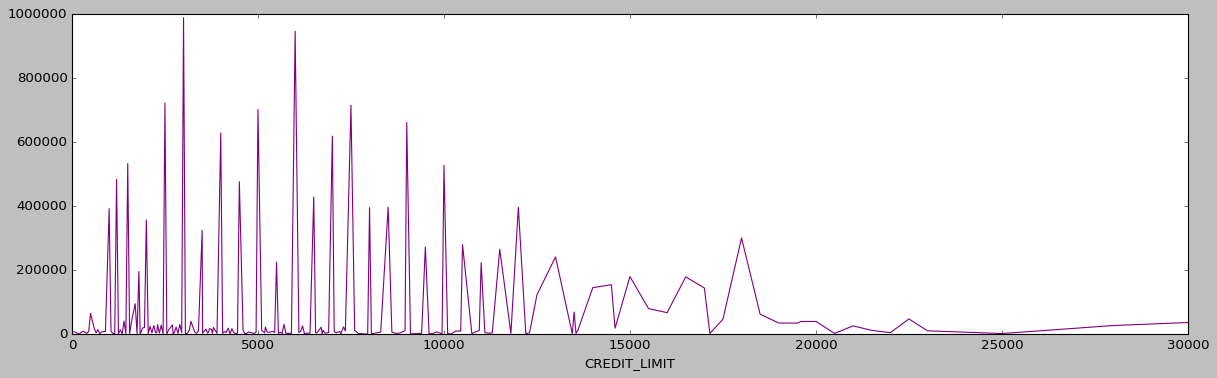

In [10]:
plt.style.use('classic')
df.groupby('CREDIT_LIMIT')['PAYMENTS'].sum().plot(figsize=(18, 5), color='purple')

In [11]:
df.shape


(8950, 17)

In [12]:
#pred_2019.fillna(pred_2019.mean(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)


In [13]:
df.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

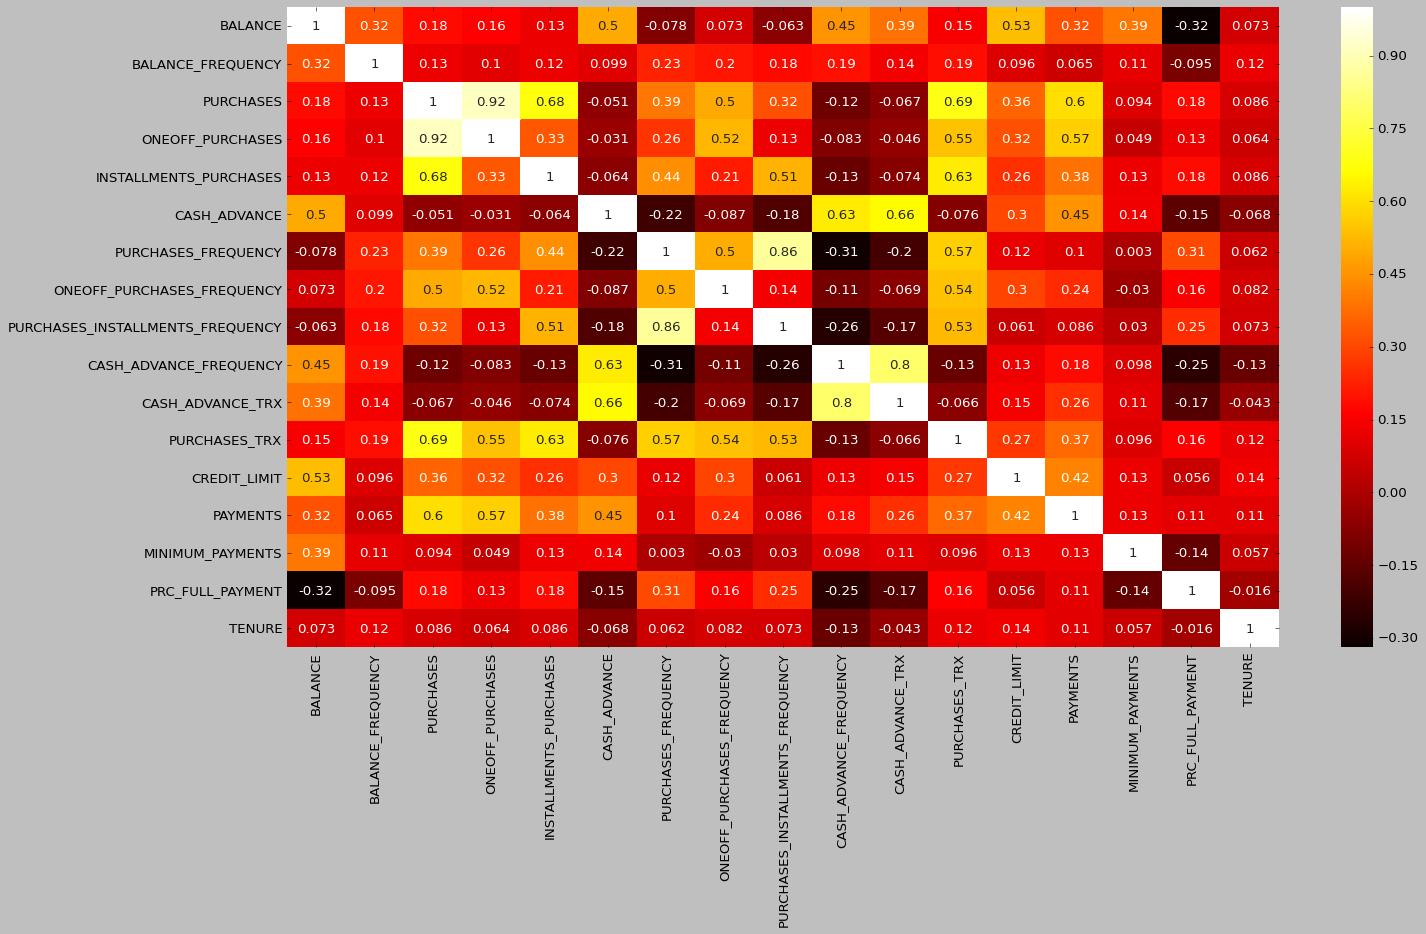

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='hot')

#**Normalizando**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

In [16]:
# col_ordem = list(df.columns)

In [17]:
# label = df["PURCHASES"]

In [18]:
dfx = scaler.fit_transform(df)

In [19]:
# col_norma = list(df.columns)
# col_norma.remove("PURCHASES")

In [20]:
df = pd.DataFrame(dfx, columns=df.columns)

In [21]:
# df["PURCHASES"] = label
# df = df.reindex(columns=col_ordem)

In [22]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


#**PCA**

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

In [24]:
pca

PCA(n_components=10)

In [25]:
# y = np.array(df["PURCHASES"])
# x = np.array(df.drop("PURCHASES", axis=1)) #Compras feitas da conta

In [26]:
XX = np.array(df)

In [27]:
pca.fit(XX)

PCA(n_components=10)

In [28]:
pca.components_.shape

(10, 17)

In [29]:
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.27290037, 0.20301991, 0.08791979, 0.07479975, 0.06262792,
       0.05750211, 0.04887235, 0.04257486, 0.03828804, 0.03080006])

In [30]:
pca.explained_variance_ratio_.cumsum()


array([0.27290037, 0.47592029, 0.56384008, 0.63863983, 0.70126775,
       0.75876986, 0.80764221, 0.85021707, 0.88850511, 0.91930517])

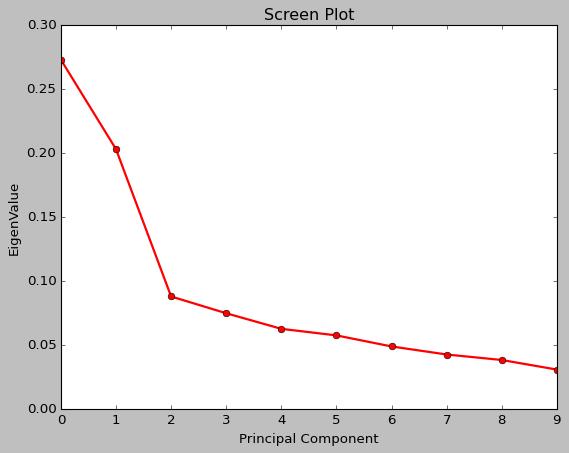

In [31]:
fig = plt.plot(figsize=(16,9))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Screen Plot")
plt.xlabel('Principal Component')
plt.ylabel('EigenValue')
plt.show()

In [32]:
explained_variance = np.insert(explained_variance, 0, 0)


In [33]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [34]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)

In [35]:
fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [36]:
n = pca.n_components
lista_pca = []
for i in range(n):
  lista_pca.append(pca.transform(XX)[:, i])

In [37]:
df_PCA = pd.DataFrame()  
coluna_pca = ['PCA1', 'PCA2', 'PCA3','PCA4', 'PCA5', 'PCA6','PCA7', 'PCA8', 'PCA9','PCA10']
cont = 0
for i in coluna_pca:
  df_PCA[i] = lista_pca[cont]
  cont+=1

In [38]:
df_PCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340,-0.077774
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878,-0.777671
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,-0.883727,-0.001939
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,-0.146564,0.393144
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,0.584619,-0.121734
...,...,...,...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,0.201213,1.420524,-0.845404
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,-0.554112,0.886695,-1.246153
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823,-0.345934,0.838190,-0.830005
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,0.148077,1.253573,0.268660


Mostrando que o PCA são linearmente independente

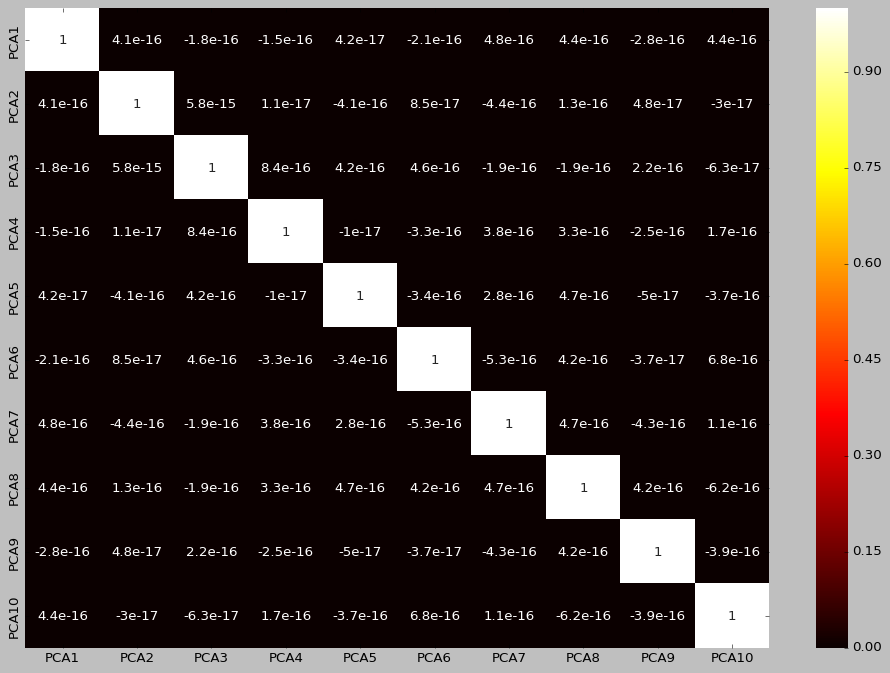

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_PCA.corr(), annot=True, cmap='hot')

In [40]:
aux = df_PCA[["PCA1","PCA2","PCA3"]]
aux

,PCA1,PCA2,PCA3
0,-1.682220,-1.076451,0.488507
1,-1.138295,2.506477,0.601212
2,0.969684,-0.383520,0.102371
3,-0.873628,0.043166,1.460167
4,-1.599434,-0.688581,0.365094
...,...,...,...
8945,-0.359629,-2.016145,-0.995355
8946,-0.564369,-1.639123,-1.290238
8947,-0.926204,-1.810786,-0.474723
8948,-2.336552,-0.657966,0.974725


In [41]:
fig = px.scatter_3d(aux, x='PCA1', y='PCA2', z='PCA3')

fig.show()

In [42]:
y = np.array(df["PURCHASES"])
x = np.array(df.drop("PURCHASES", axis=1)) 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0 )

In [45]:
X_train.shape , y_train.shape

((8055, 16), (8055,))

In [46]:
X_test.shape , y_test.shape


((895, 16), (895,))

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
model = linear_model.LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)
y_pred

array([-3.99551640e-01, -2.45016502e-01,  1.21140002e-01,  4.36092431e-01,
        4.56527815e-01, -2.75328577e-01,  1.08099563e-01,  3.02412550e+00,
       -1.64440488e-01, -4.56926885e-01,  1.25347380e+01, -4.51248917e-01,
        1.51344718e-01,  8.69167717e-01, -4.69573765e-01, -3.99527811e-01,
        1.19666709e+00,  1.82432514e-02, -4.69489032e-01, -3.44885836e-01,
       -2.06229666e-02, -4.69627403e-01, -3.62407603e-01, -3.52262505e-01,
       -3.16616485e-01,  4.79593686e+00,  1.39692190e+00, -4.69637253e-01,
        6.79163171e-01, -2.30023547e-01, -1.95408087e-01, -4.69596114e-01,
       -4.69539941e-01,  2.73966677e+00,  2.66554063e+00, -3.72117166e-01,
       -4.69614222e-01, -2.08332971e-01,  3.95665519e-01, -3.61450629e-01,
       -2.63194213e-01, -3.58651559e-01, -4.17273418e-01, -3.62291796e-01,
        4.99816196e+00, -4.69725081e-01,  7.26174755e-01, -3.72059555e-01,
        2.12213225e+00,  5.10330793e-01,  4.16936160e-01, -1.88617618e-01,
       -6.58120302e-02, -

In [51]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(y_test, y_pred))

Coefficients: [ 5.28496734e-05  1.56455357e-05  7.76971010e-01  4.22970881e-01
  6.58694392e-06 -2.39126185e-04  2.05705509e-04  2.80942533e-04
  3.65269427e-05 -1.38278433e-05 -1.09032776e-04 -2.36319873e-05
  2.02763775e-06  4.56024355e-05  1.21550582e-05  3.96060995e-06]
Intercept: 2.533888359289218e-06
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 0.99998


In [52]:
r2_score(y_test, y_pred)

0.9999795815415785

#**Clustering**


Pelos coeficientes da regressão linear, selecionarei os 3 PCAs mais importantes.

In [53]:
df_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340,-0.077774
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878,-0.777671
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,-0.883727,-0.001939
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,-0.146564,0.393144
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,0.584619,-0.121734


In [54]:
# features = df_PCA[["PCA3", "PCA4"]]
# label = df["PURCHASES"]

In [55]:
from sklearn.cluster import KMeans

In [56]:
df.shape

(8950, 17)

In [57]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}
# Essa configurações aqui significa : "init": "random"    -> Método de Inicialização
#                                     "n_init": 10        -> Número de vezes que o KMEANS será executado
#                                     "max_iter": 300     -> Máximo de iterações por execução 
#                                     "random_state": 42  -> Geração de números aleatórios para a inicialização
x=np.array(df)
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

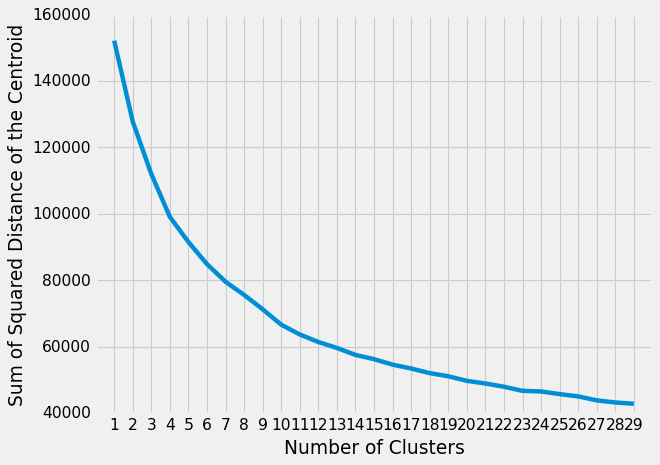

In [58]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distance of the Centroid")
plt.show()

Vou escolher 8 clusters

In [59]:
kmeans = KMeans(n_clusters=8)

In [60]:
kmeans.fit(df)  #df is already normalize

KMeans()

In [61]:
label = kmeans.labels_
label

array([2, 4, 1, ..., 0, 0, 0], dtype=int32)

In [62]:
from collections import Counter

In [63]:
Counter(label)

Counter({0: 624, 1: 1118, 2: 2757, 3: 1185, 4: 869, 5: 2021, 6: 23, 7: 353})

In [64]:
# cluster0_mean = []
# cluster1_mean = []

# for cluster, sample in zip(kmeans_predict, df["PURCHASES"]):
#   if cluster == 0 :
#     cluster0_mean.append(sample)
#   if cluster == 1 :
#     cluster1_mean.append(sample)


In [65]:
# nome_aleatorio = list(df["PURCHASES"])
# sorted(nome_aleatorio, reverse=True)

In [66]:
# np.array(cluster0_mean).mean()

In [67]:
# np.array(cluster1_mean).mean()

In [68]:
85bgvd

SyntaxError: ignored

In [ ]:
clusters=pd.concat([df, pd.DataFrame({'cluster':label})], axis=1)
clusters.head()

In [ ]:
plt.figure(figsize=(16, 9))
plt.scatter(features["PCA3"], features["PCA4"], c=kmeans_predict.astype(float))